In [1]:
import sklearn.model_selection
import torch 
import torch.nn as nn
import torch.optim as optim
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_samples = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

circles = pd.DataFrame({"X1": X[:,0], 
                        "X2":X[:,1], 
                        "Label": y})
circles.head(50)
#plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)
# viewing samples of features and labels
#print(f"X sample--> {X[0]} \n y sample--> {y[0]}")
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
y_train.shape

torch.Size([800])

### Possible reason of using RELU
since Relu just keeps on making the boundary bend it makes it perfect for maing a circle like boundary!!! 

In [4]:
class CircleModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.network  =  nn.Sequential(
            nn.Linear(2,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,1)       
            )
    def forward(self,x):
        return self.network(x)

both loss function and optimizers have their best case of usage i.e like:

BCELoss -> requires input to have gone through sigmoid function

BCEwithLogitLoss() --> have sigmoid function built in 

In [5]:
Model = CircleModel()
Loss_fcn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(params=Model.parameters(),lr=0.1)
#Model.state_dict()

Artificial neural network --> combination of Linear and non Linear function whaich are potentially able to find patterns in data.

In [6]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc
    

In [7]:
Model

CircleModel(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

logits --> raw network output without been passed into any activation function

In [8]:
Model.eval()
with torch.inference_mode():
    output = Model(X_test[:10])
    output_1 = Model(torch.sigmoid(X_test[:10]))
#print(f"set_1 : {output} \n  set_2 : {output_1}")
a = output.squeeze()
output.shape

torch.Size([10, 1])

In [9]:
# finding predicted labels 
y_pred = torch.round(output)
#logits -> pred probs -> pred lables
labels = torch.round(output_1)
#y_pred == labels


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [9]:
epochs = 500
for epoch in range(epochs):
    ###-----------------Training--------------###
    Model.train()
    
    # 1. forward pass    
    output = Model(X_train).squeeze() 
    pred_labels = torch.round(torch.sigmoid(output)) # logits -> pred probabilites -> predictions
    
    # 2.loss calculation/accuracy
    loss = Loss_fcn(output,y_train)
    acc = accuracy(y_true=y_train,y_pred=pred_labels)
    
    # 3. optimizer zero grad
    optimizer.zero_grad()
    
    # 4.Loss backward propagation (gradient descent)
    loss.backward()
    
    # 5. optimizer step
    optimizer.step()

    with torch.inference_mode():
        # forward pass
        test = Model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test))
        test_loss = Loss_fcn(test,y_test)
        test_acc = accuracy(y_test,test_pred)   
    
    print(f"Epoch: {epoch} |, loss : {loss:.4f} |, Acc: | {acc:.2f}% |, Test loss | {test_loss:.3f}, | test accuracy | {test_acc:.2f}% ")
print(output.shape)

Epoch: 0 |, loss : 0.6936 |, Acc: | 50.25% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 1 |, loss : 0.6936 |, Acc: | 50.25% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 2 |, loss : 0.6936 |, Acc: | 50.12% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 3 |, loss : 0.6935 |, Acc: | 50.00% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 4 |, loss : 0.6935 |, Acc: | 50.12% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 5 |, loss : 0.6935 |, Acc: | 50.12% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 6 |, loss : 0.6935 |, Acc: | 50.25% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 7 |, loss : 0.6934 |, Acc: | 50.25% |, Test loss | 0.692, | test accuracy | 53.00% 
Epoch: 8 |, loss : 0.6934 |, Acc: | 50.25% |, Test loss | 0.692, | test accuracy | 52.50% 
Epoch: 9 |, loss : 0.6934 |, Acc: | 50.12% |, Test loss | 0.692, | test accuracy | 52.50% 
Epoch: 10 |, loss : 0.6934 |, Acc: | 50.25% |, Test loss | 0.692, | test accuracy | 52.50%

In [13]:
correct = torch.eq(y_test,test_pred).sum().item()
pred_labels

tensor([0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 

## Improving a model (from model perspective)
- add more layers - i.e give model more chance to learn pattern
- add more hidden units
- fit for longer 
- changing activation function
- changing loss function

In [53]:
A = torch.arange(-100,50,1,dtype=torch.float32)
B = torch.relu(A)
C = torch.relu(B)
D = -(B * 0.5) + 3
E = torch.sigmoid(D)
F = torch.tanh(E)
G = torch.sigmoid(F)

print(f"""
      A: {A[120]}
      B: {B[120]}
      C: {C[120]}
      D: {D[120]}
      E: {E[120]}
      F: {F[120]}
      G: {G[120]}
      """)
torch.max(F)
torch.min(F)


      A: 20.0
      B: 20.0
      C: 20.0
      D: -7.0
      E: 0.0009110511746257544
      F: 0.0009110509417951107
      G: 0.5002277493476868
      


tensor(4.5991e-10)

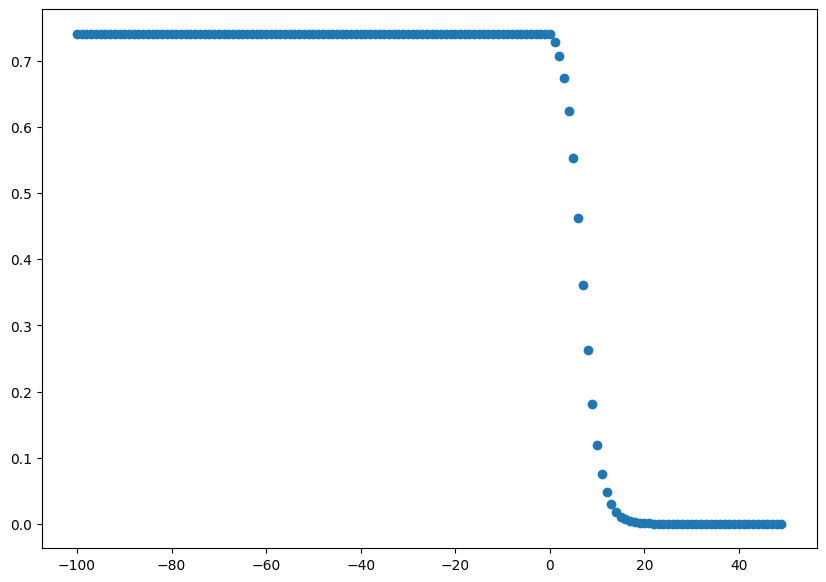

In [54]:
plt.figure(figsize=(10,7))
#plt.scatter(A,B)
#plt.scatter(A,C)
#plt.scatter(A,D)
#plt.scatter(A,E)
plt.scatter(A,F)
#plt.scatter(A,G)

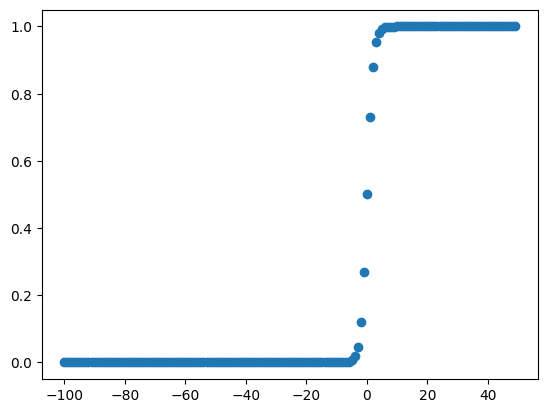

In [56]:
plt.scatter(A,(1/(1 + torch.exp(-A))))